# 代码随想录 Chapter3 Hash Table

**哈希表理论基础**

建议：大家要了解哈希表的内部实现原理，哈希函数，哈希碰撞，以及常见哈希表的区别，数组，set 和map。  

什么时候想到用哈希法，当我们遇到了要快速判断一个元素是否出现集合里的时候，就要考虑哈希法。  这句话很重要，大家在做哈希表题目都要思考这句话。 

https://programmercarl.com/哈希表理论基础.html#哈希表

## 总结

三种哈希结构： array, set, dictionary

#### 1. Array as Hashtable:
- **Usage**: Arrays (or lists in Python) can be used as a simple hashtable when you have **a small, fixed range of integer key**s. In this case, the index of the array acts as the key, and the element at that index is the value.
- **Key**: The array index (an integer).
- **Value**: The data stored at that index.
- **When to Use**:
  - When the keys are **sequential integers**.
  - When memory is not a constraint (as arrays can waste memory if the range of keys is large but sparsely populated).
  - When the dataset is small and operations are simple.
  - e.g. 26个英文字母

#### 2. Set as Hashtable:
- **Usage**: A set in Python can act as a hashtable with keys but no associated values. It is ideal for storing unique elements and checking membership efficiently.
- **Key**: The element itself.
- **Value**: <span style="color:red">Sets do **not** store values, only keys</span>.
- **When to Use**:
  - When you need to keep track of **unique items**.
  - When the primary operations are **insertion, deletion, and check operations** because they take $O(1)$ time complexity.
  - When you don't need to store additional data (values) associated with the keys.
  - e.g. LC349, 128

#### 3. Dictionary as Hashtable:
- **Usage**: A dictionary in Python is a direct implementation of a hashtable, where each **key-value pair** is stored.
- **Key**: The unique identifier used to store and retrieve the value.
- **Value**: The data associated with a key.
- **When to Use**:
  - When you need to associate values with keys (not just check for the presence of a key).
  - When keys are non-sequential or non-integer.
  - For more complex data structures where each element needs to store multiple attributes.
  - <span style="color:red">Keys should be of **immutable** datatype: numbers, string, tuple.</span>


我自己的理解是dictionary是最standardize的hashtable，其他两个都是它的简化版本。

In [2]:
from typing import Optional, List, Dict, Any, Tuple, Union

## LC242. Valid Anagram (Easy)

![Screenshot 2024-02-05 at 17.22.14.png](<attachment:Screenshot 2024-02-05 at 17.22.14.png>)
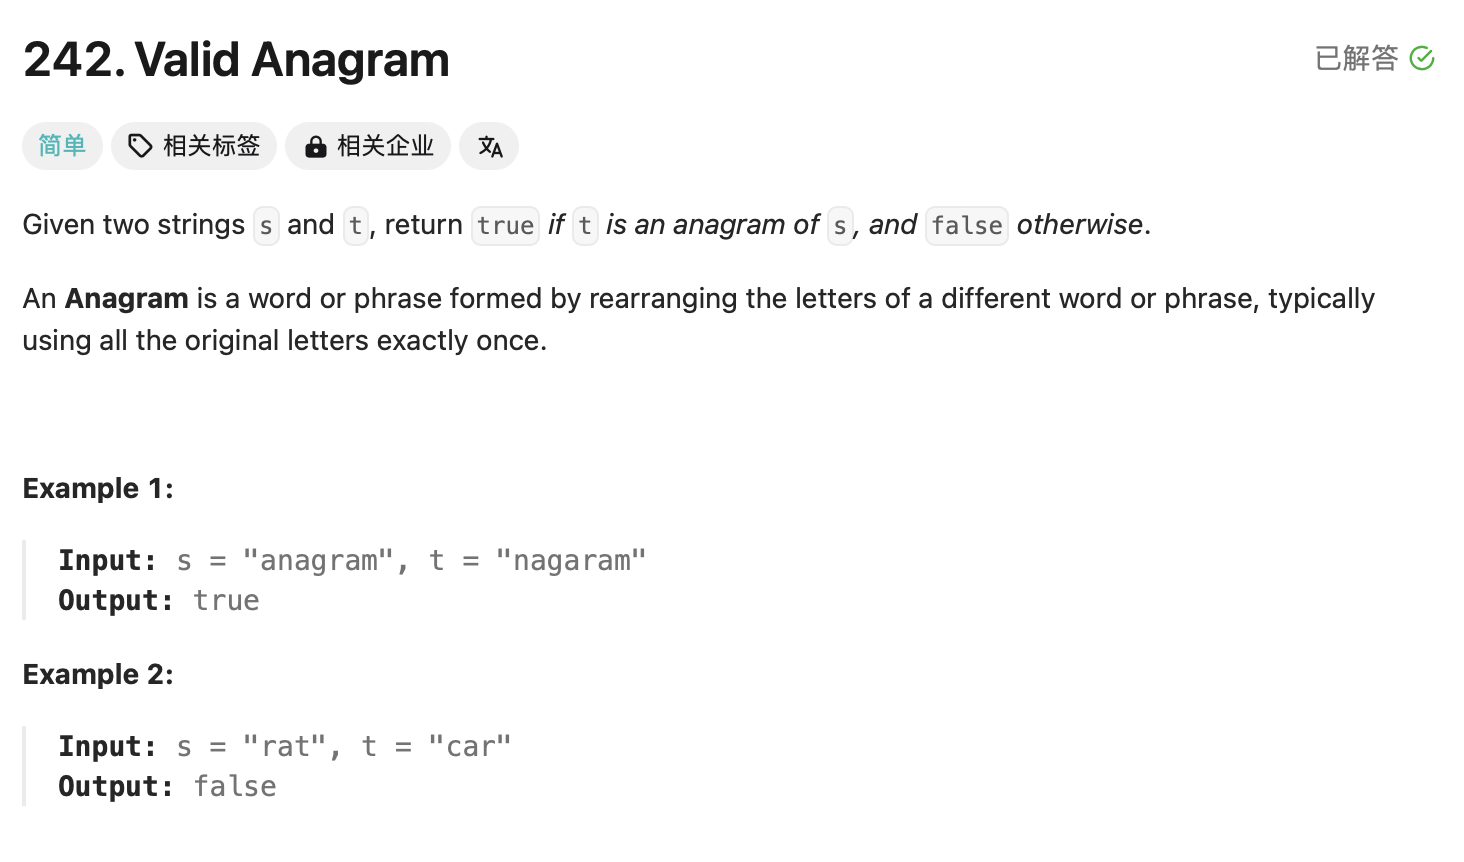

简单题我就不多做讲解了，本题方法: three structures of hash table, for this question we can use **array** or **dictionary**.

### Method1: array as hashtable

In [3]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        record = [0] * 26
        for i in s:
            # 并不需要记住字符a的ASCII，只要求出一个相对数值就可以了
            record[ord(i) - ord("a")] += 1      # (1)
        for i in t:
            record[ord(i) - ord("a")] -= 1      # (2)
        for i in range(26):
            if record[i] != 0:
                # record数组如果有的元素不为零0，说明字符串s和t一定是谁多了字符或者谁少了字符。
                return False
        return True

# test 
letter_count = Solution()
letter_count.isAnagram("anagram", "nagaram")

True

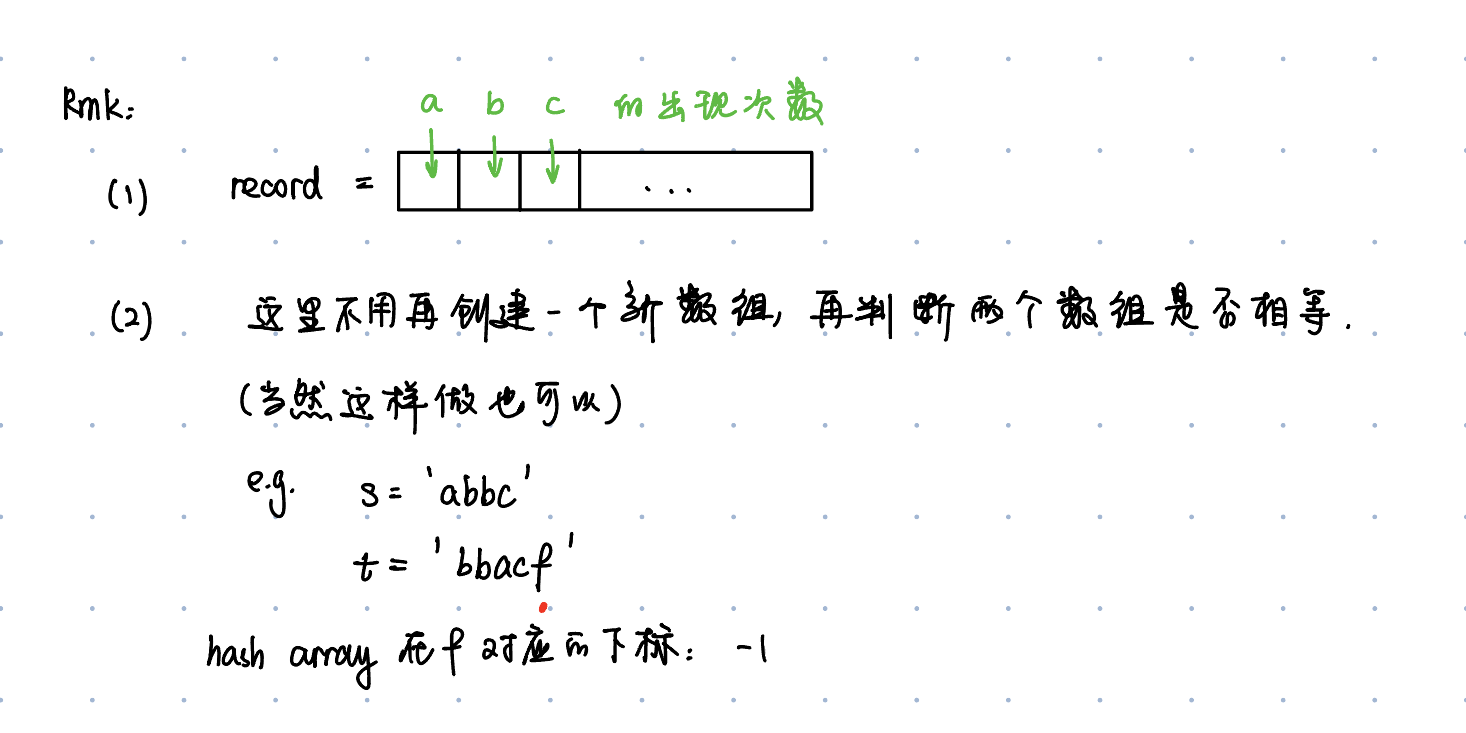

### method2: defaultdict as hashtable

In [4]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        
        from collections import defaultdict
        
        s_dic = defaultdict(int) # dd with value being integers
        t_dic = defaultdict(int) 

        # key: letter, value: number of occurence 
        for x in s:
            s_dic[x] += 1
        
        for x in t:
            t_dic[x] += 1
            
        return s_dic == t_dic # compare both key and value


If I print these two defaultdict,  

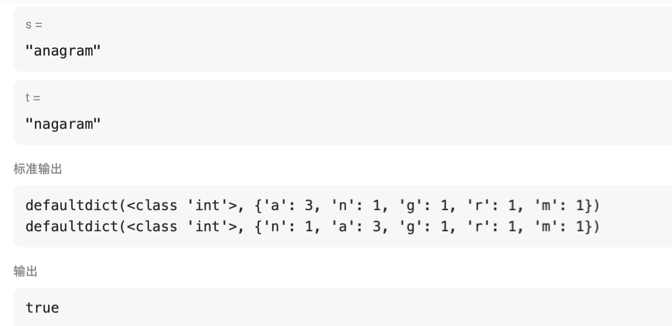

时间复杂度：$O(M + N)$, where M = len(s), N = len(t)

## LC383 Ransom note (Easy)

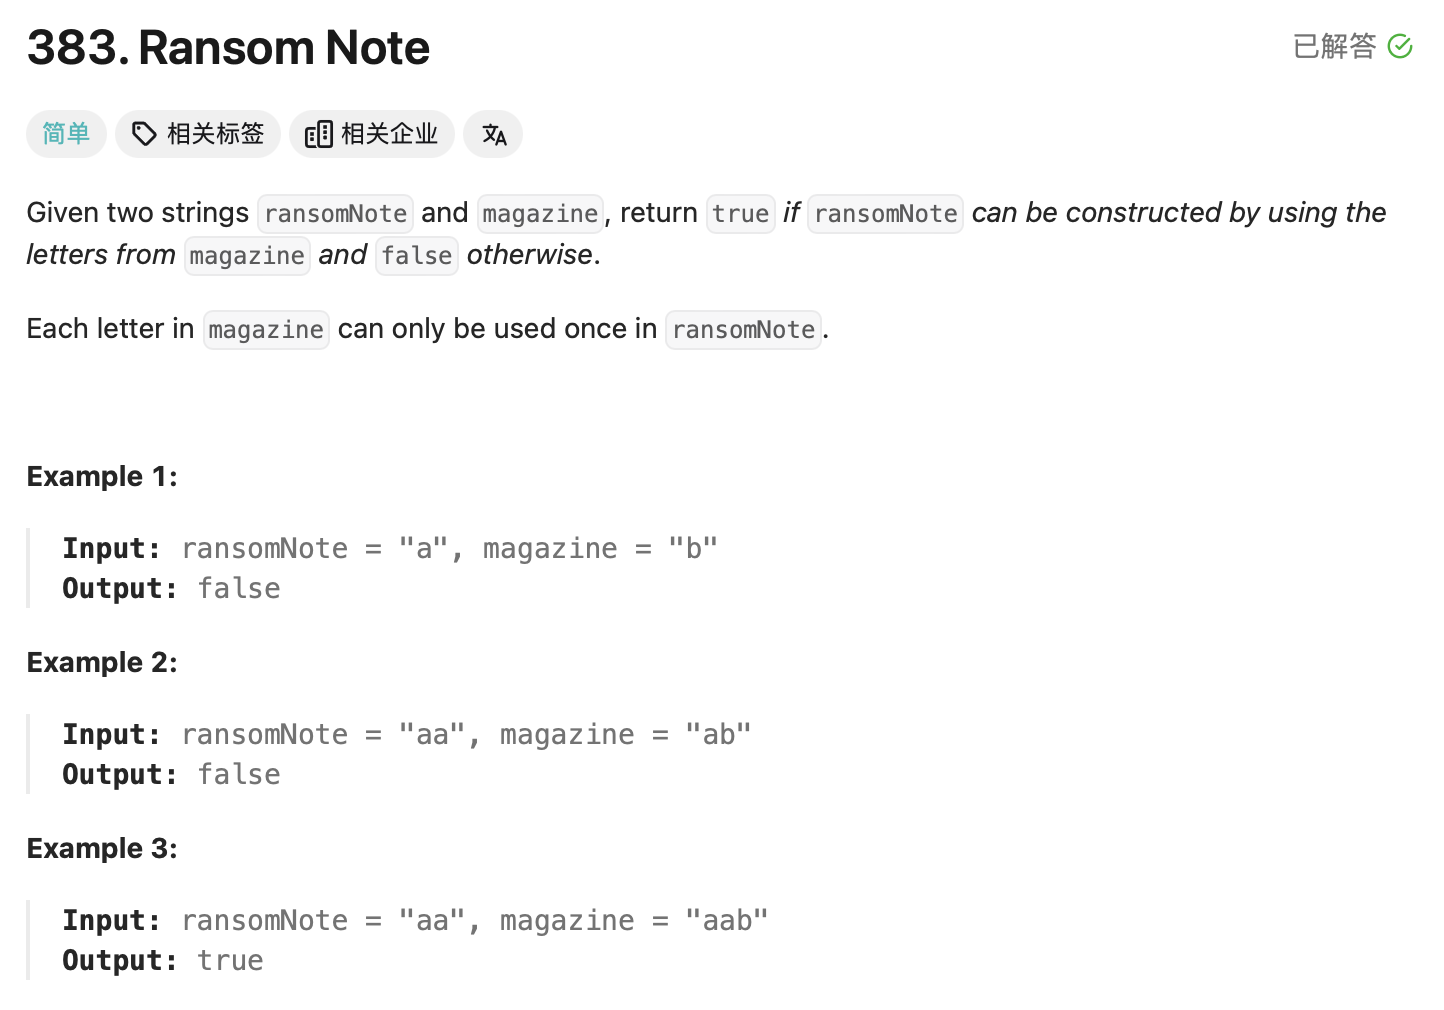

这道题目和 LC242. Valid Anagram 很像，LC242相当于求 字符串a 和 字符串b 是否可以相互组成 ，而这道题目是求字符串b能不能组成字符串a。本题判断第一个字符串ransom能不能由第二个字符串magazines里面的字符构成，但是这里需要注意两点。

- Each letter in magazine can only be used once in ransomNote.

- “你可以假设两个字符串均只含有小写字母。” 说明只有小写字母，这一点很重要：说明可以用array作为hashmap，方法同LC242。


### 法1: array as hashtable

In [3]:
class Solution:
    def canConstruct(self, ransomNote: str, magazine: str) -> bool:
        # 法1：array as hashmap
        # Initialize hashmap
        letter_count = [0] * 26

        # Build hashmap with all letters in magazine
        for letter in magazine:
            letter_count[ord(letter) - ord('a')] += 1
        
        # Try to construct ransomNotese using letters from hashmap
        for letter in ransomNote:
            letter_count[ord(letter) - ord('a')] -= 1

        flag = True
        for i in range(26):
            if letter_count[i] >= 0:
                continue 
            else:
                flag = False
                break
        
        return flag

# test
letter_count = Solution()
letter_count.canConstruct("aa", "aab")

True

In [6]:
class Solution:
    def canConstruct(self, ransomNote: str, magazine: str) -> bool:
        # 法1：array as hashmap
        # Initialize hashmap
        letter_count = [0] * 26

        # Build hashmap with all letters in magazine
        for letter in magazine:
            letter_count[ord(letter) - ord('a')] += 1
        
        # Try to construct ransomNotese using letters from hashmap
        for letter in ransomNote:
            letter_count[ord(letter) - ord('a')] -= 1

        ### 唯一小改进
        return all(letter_count[i] >=0 for i in range(26))
    
# test
letter_count = Solution()
letter_count.canConstruct("aa", "aab")


True

Note：all() 函数会遍历传入的可迭代对象，只有当所有元素都为 True 时，才会返回 True；如果有任何一个元素为 False，就立即返回 False 并停止检查.

### 法2: dict

In [10]:
class Solution:
    def canConstruct(self, ransomNote: str, magazine: str) -> bool:
        # Initialize `letter_counts` with keys being letters and values being number of occurence
        letter_counts = {}

        # Build hashmap with all letters in magazine
        for x in magazine:
            letter_counts[x] = letter_counts.get(x, 0) + 1

        # Try to construct ransomNote using letters from hashmap
        for x in ransomNote:
            if x not in letter_counts or letter_counts[x] == 0:
                return False # 在中间加入这个判断，可以提前结束
            letter_counts[x] -= 1
        
        # If we can construct ransomNote, return True
        return True

Note: `counts.get(c, 0)`：get() 是字典的一个方法。它会查找字典 counts 中键为 c 的值。如果该键存在，则返回其对应的值；如果该键不存在，则返回默认值 0。

### 法3: defaultdict

In [9]:
from collections import defaultdict

class Solution:
    def canConstruct(self, ransomNote: str, magazine: str) -> bool:

        letter_count = defaultdict(int)

        for x in magazine:
            letter_count[x] += 1

        for x in ransomNote:
            value = letter_count.get(x, 0)
            
            if not value: # if value is 0
                return False
            else:
                letter_count[x] -= 1

        return True

## LC349. Intersection of two arrays (Easy)

![Screenshot 2024-02-05 at 17.36.28.png](<attachment:Screenshot 2024-02-05 at 17.36.28.png>)
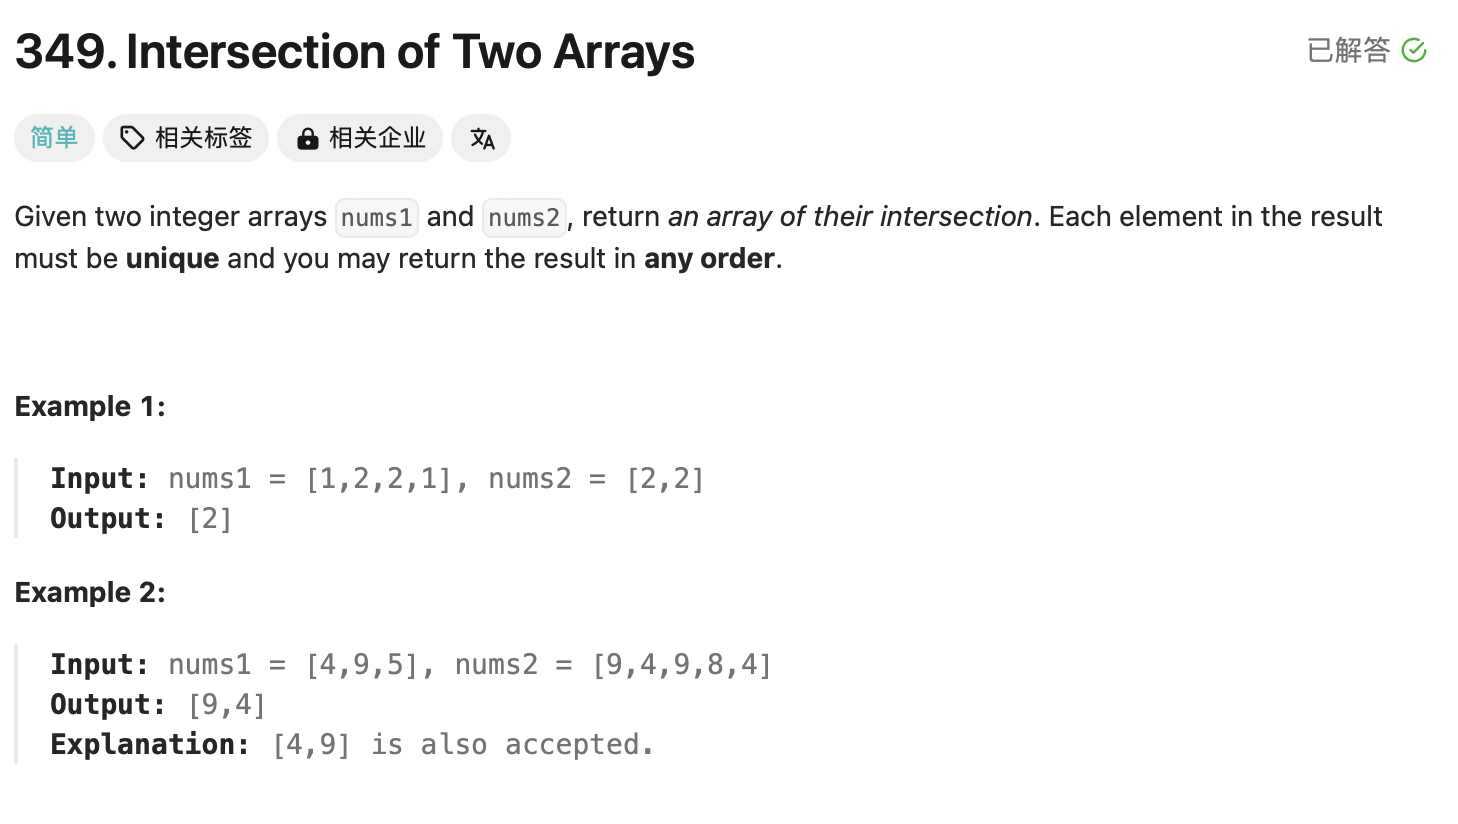

这道题目，主要要学会使用一种哈希数据结构：**unordered_set**，这个数据结构可以解决很多类似的问题。

原因是：(1) 输出结果中的每个元素一定是唯一的，也就是说输出的结果的去重的；  
（2） 同时可以不考虑输出结果的顺序

In [6]:
class Solution:
    def intersection(self, nums1: List[int], nums2: List[int]) -> List[int]:
        set1 = set(nums1)
        set2 = set(nums2)
        return list((set1 & set2))

这道题也可以用array和dict，但是set是最优解。

## LC202. Happy Number (Easy)

![Screenshot 2024-02-05 at 17.55.55.png](<attachment:Screenshot 2024-02-05 at 17.55.55.png>)
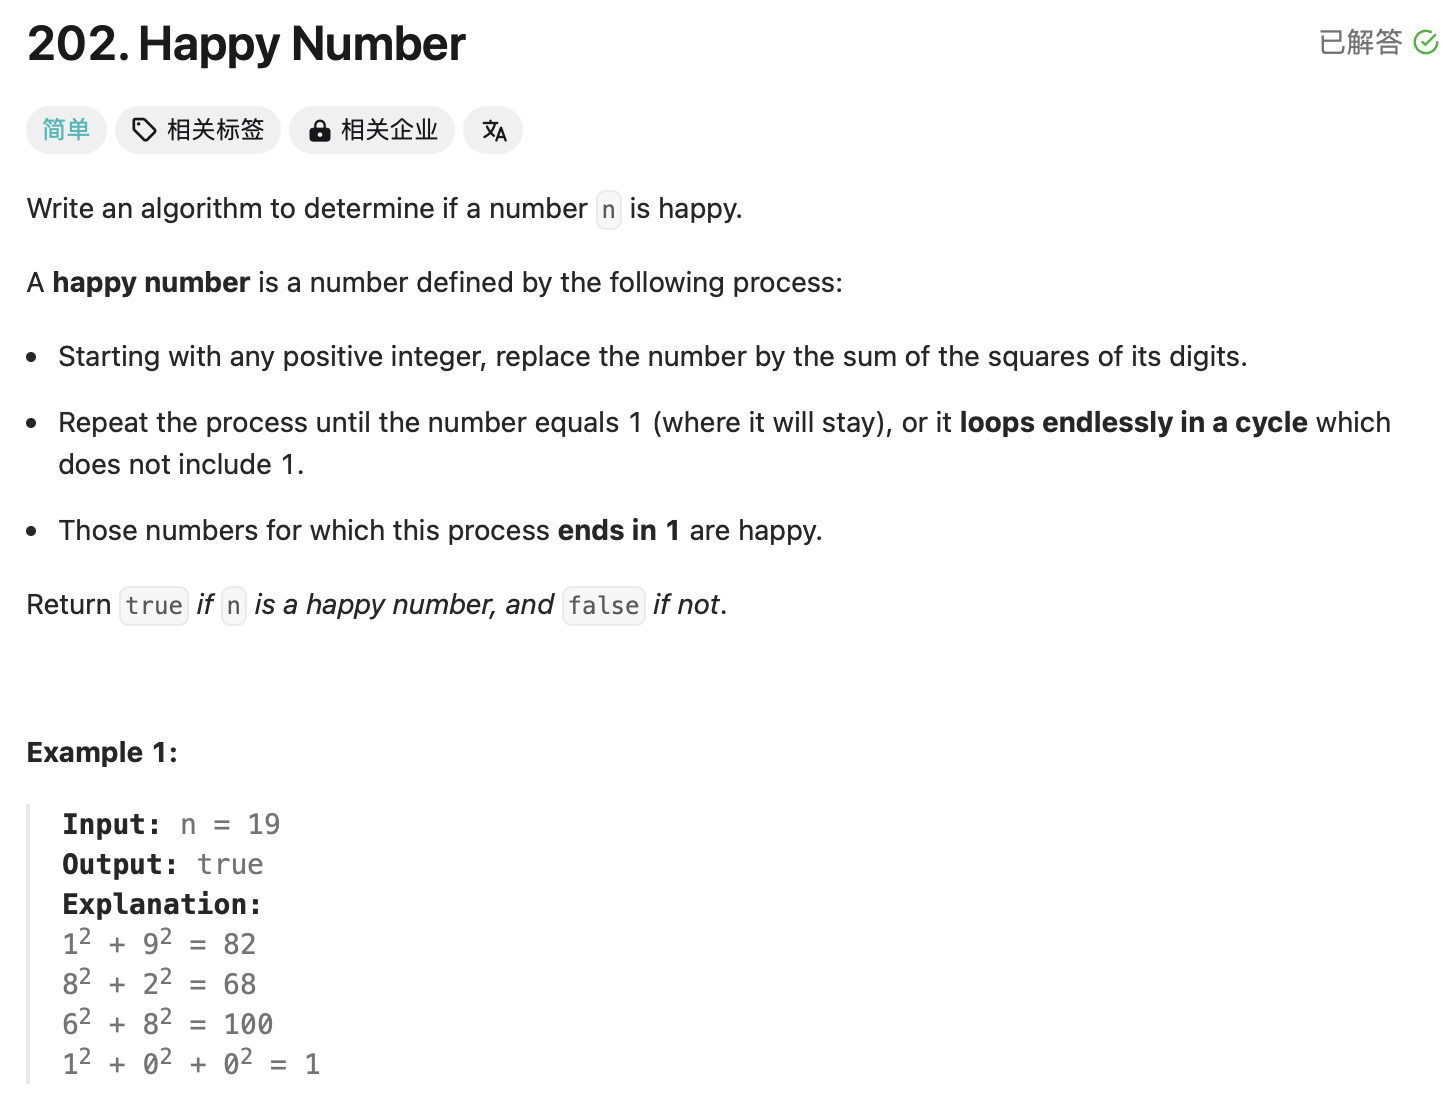

这道题目看上去貌似一道数学问题，其实并不是！

- 题目中说了会**无限循环**，那么也就是说求和的过程中，`sum`会重复出现，这对解题很重要！

    正如之前的理论基础中所说，当我们遇到了要快速判断一个元素是否出现集合里的时候，就要考虑哈希法了。

    所以这道题目使用哈希法，来**判断这个`sum`是否重复出现**，如果重复了就是`return false`， 否则一直找到`sum`为1为止。

    判断`sum`是否重复出现就可以使用`unordered_set`。

- 还有一个难点就是求和的过程，如果对取数值各个位上的单数操作不熟悉的话，做这道题也会比较艰难。


### method1: set 

In [12]:
class Solution:
    def isHappy(self, n: int) -> bool:
        # method1: set as hashtable
        record = set()
        
        # Infinite loop
        while True:
            n = self.get_sum(n)

            # if n == 1, happy number
            if n == 1:
                return True

            # if n has appeared before, then it means that it loops endlessly in a cycle which does not include 1.
            elif n in record:
                return False
            
            else:
                record.add(n)

    def get_sum(self, n: int) -> int:
        '''returns the sum of squares of the original number'''
        new_num = 0
        while n: # while n != 0
            n, r = divmod(n, 10)  # returns (商，余数), r is the last digit of n
            new_num += r**2
        return new_num

**Remark：关于`get_sum` function**

- Inside the loop, the `divmod(n, 10)` function is used to divide $n$ by $10$. The result of divmod is a tuple where the first element is the **quotient** ($n$ 的前几位) and the second element is the **remainder** (the last digit of $n$). 这里的目的是**effectively separating the last digit from the rest of the number**. 

- 然后继续对remainder重复此操作，一位一位的separate，故而要用**while loop**。注意while loop的终止条件是`n = 0`, 说明$n$已经是个位数了，不需要继续separate。（下面的例子可以验证）

In [10]:
print(divmod(129, 10)) 
print(divmod(12, 10))
print(divmod(1, 10)) 

(12, 9)
(1, 2)
(0, 1)


### method2: set + convert to str

In [15]:
class Solution:
    def isHappy(self, n: int) -> bool:
        # method2: set + convert to str
        record = set()
        record.add(n)
        
        while True:
            # 思路还是去计算new_num, 看有没有重复/死循环
            new_num = 0
            for number in str(n):
                new_num += int(number) ** 2
            n = new_num
            
            # 判断
            if n == 1:
                return True
            if n in record:
                return False
            else: 
                record.add(new_num)

In [16]:
class Solution:
    def isHappy(self, n: int) -> bool:
        # method2: set + convert to str  写法2
        record = set()

        while n not in record:
            record.add(n)
            # 计算new_num
            new_num = 0
            for number in str(n):
                new_num += int(number)**2
            n = new_num

            # 判断
            if new_num == 1:
                return True
            else: # 如果new_num不是1，将n赋值，然后再次进入while loop判断 
                n = new_num  

        # 如果new_num不是1，while loop也进不去，说明n is in record, return False
        return False
            

In [14]:
# remark: str(n)
n = 129
str(n)
for i in str(n):
    print(i) # print every character in n as a string

1
2
9


### method3: array as hashtable

写法跟set完全一样

In [17]:
class Solution:
    def isHappy(self, n: int) -> bool:
        # method3: array as hashtable
        record = list()

        while n not in record:
            record.append(n)   # 唯一不同是set和array添加的语句
            # 计算new_num
            new_num = 0
            for number in str(n):
                new_num += int(number)**2
            n = new_num

            # 判断
            if new_num == 1:
                return True
            else: 
                n = new_num 
                
        return False
            

## LC1. Two Sum (Easy)

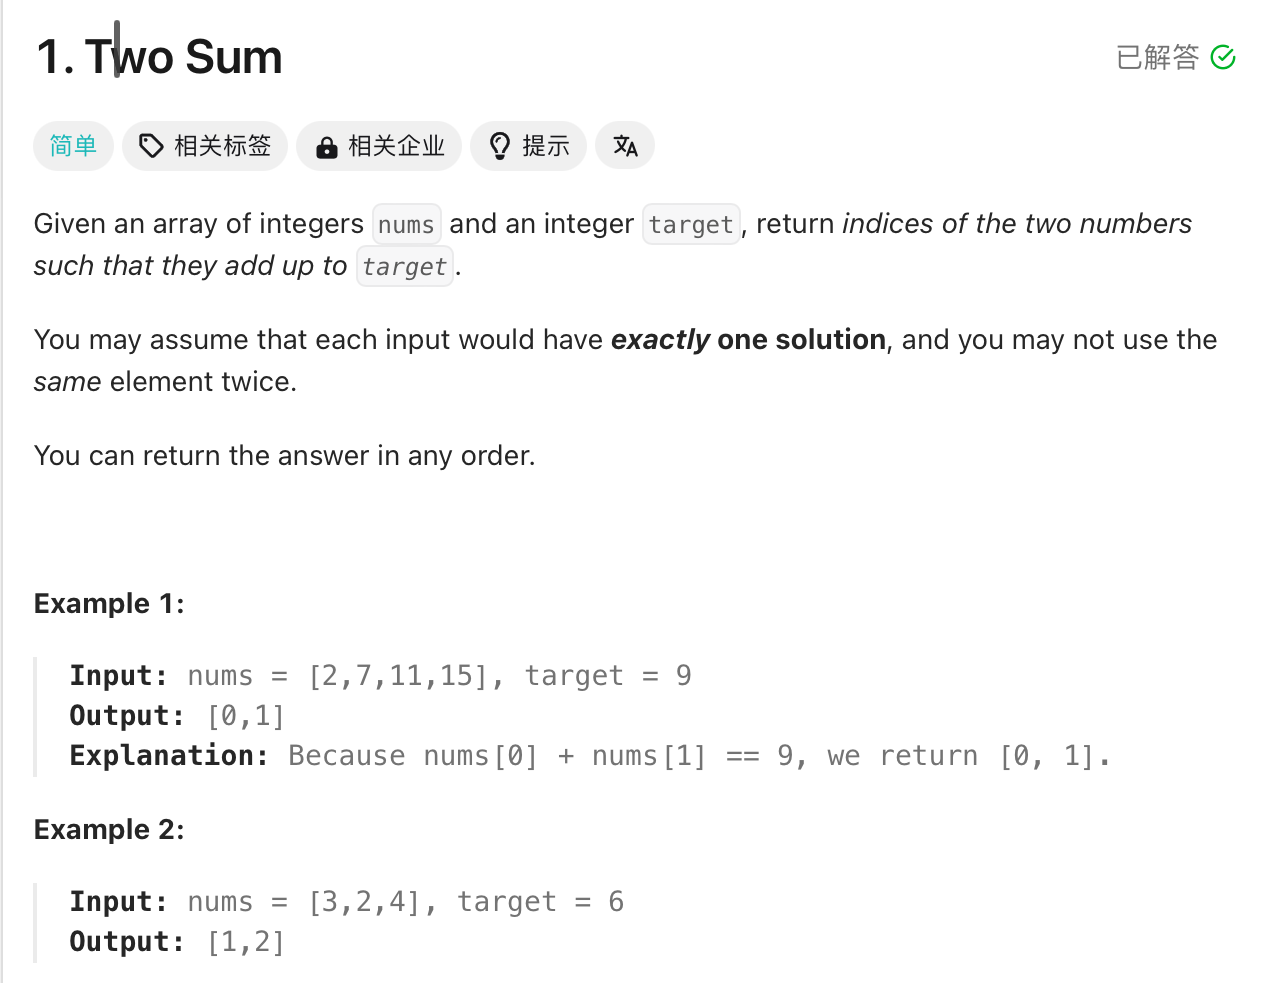

### method1: Dict as hashtable

**思路分析**

**Q1: 为什么要用哈希表？**
判断元素是否在集合中出现过，第一反应是哈希法，或者用哈希结构作处理。

对于这道题，例如：`nums = [2, 7, 3, 6]`, `target = 9`, 如果我现在遍历到`3`了，我们就想看看 `target - 3` 是不是在之前遍历过的数字中。如果是，那么我们就找到了满足条件的一对数，他们相加等于 `9`。

**Q2: 哈希表是用来存放什么的？**

<span style="color:red"><u>**hashtable**</u>来存放<u>**遍历过的元素**</u>。</span>


**Q2: 用什么结构来存放遍历过的元素？**

用<span style="color:red">**Dictionary**</span>。

**Q3: 为什么让元素当key，让index当value呢？**

因为我们想要查找某个**元素**是否出现过。Dictionary就是能在$O(1)$的时间，快速的查找key是否出现过。而且还能找到该数在原来数组中的index，符合题目的要求。下图是一个`nums`的例子。


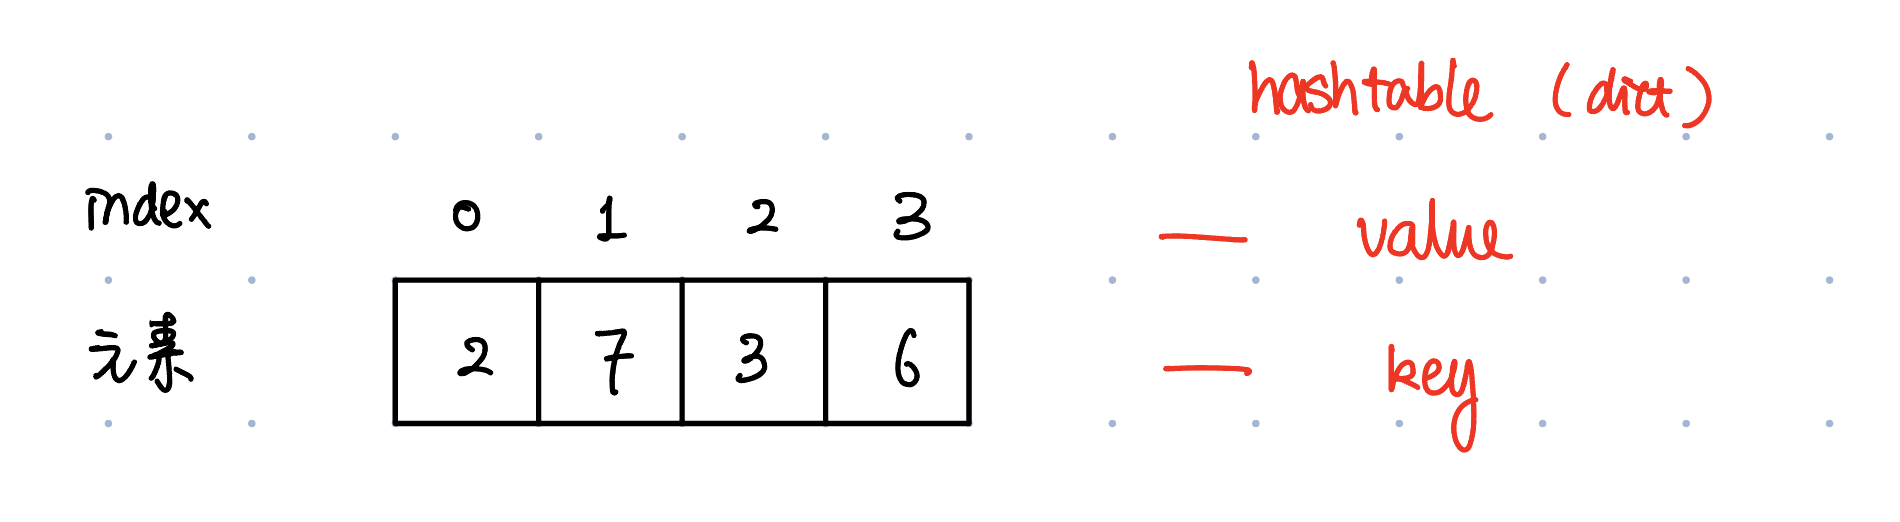

具体的操作过程举例：

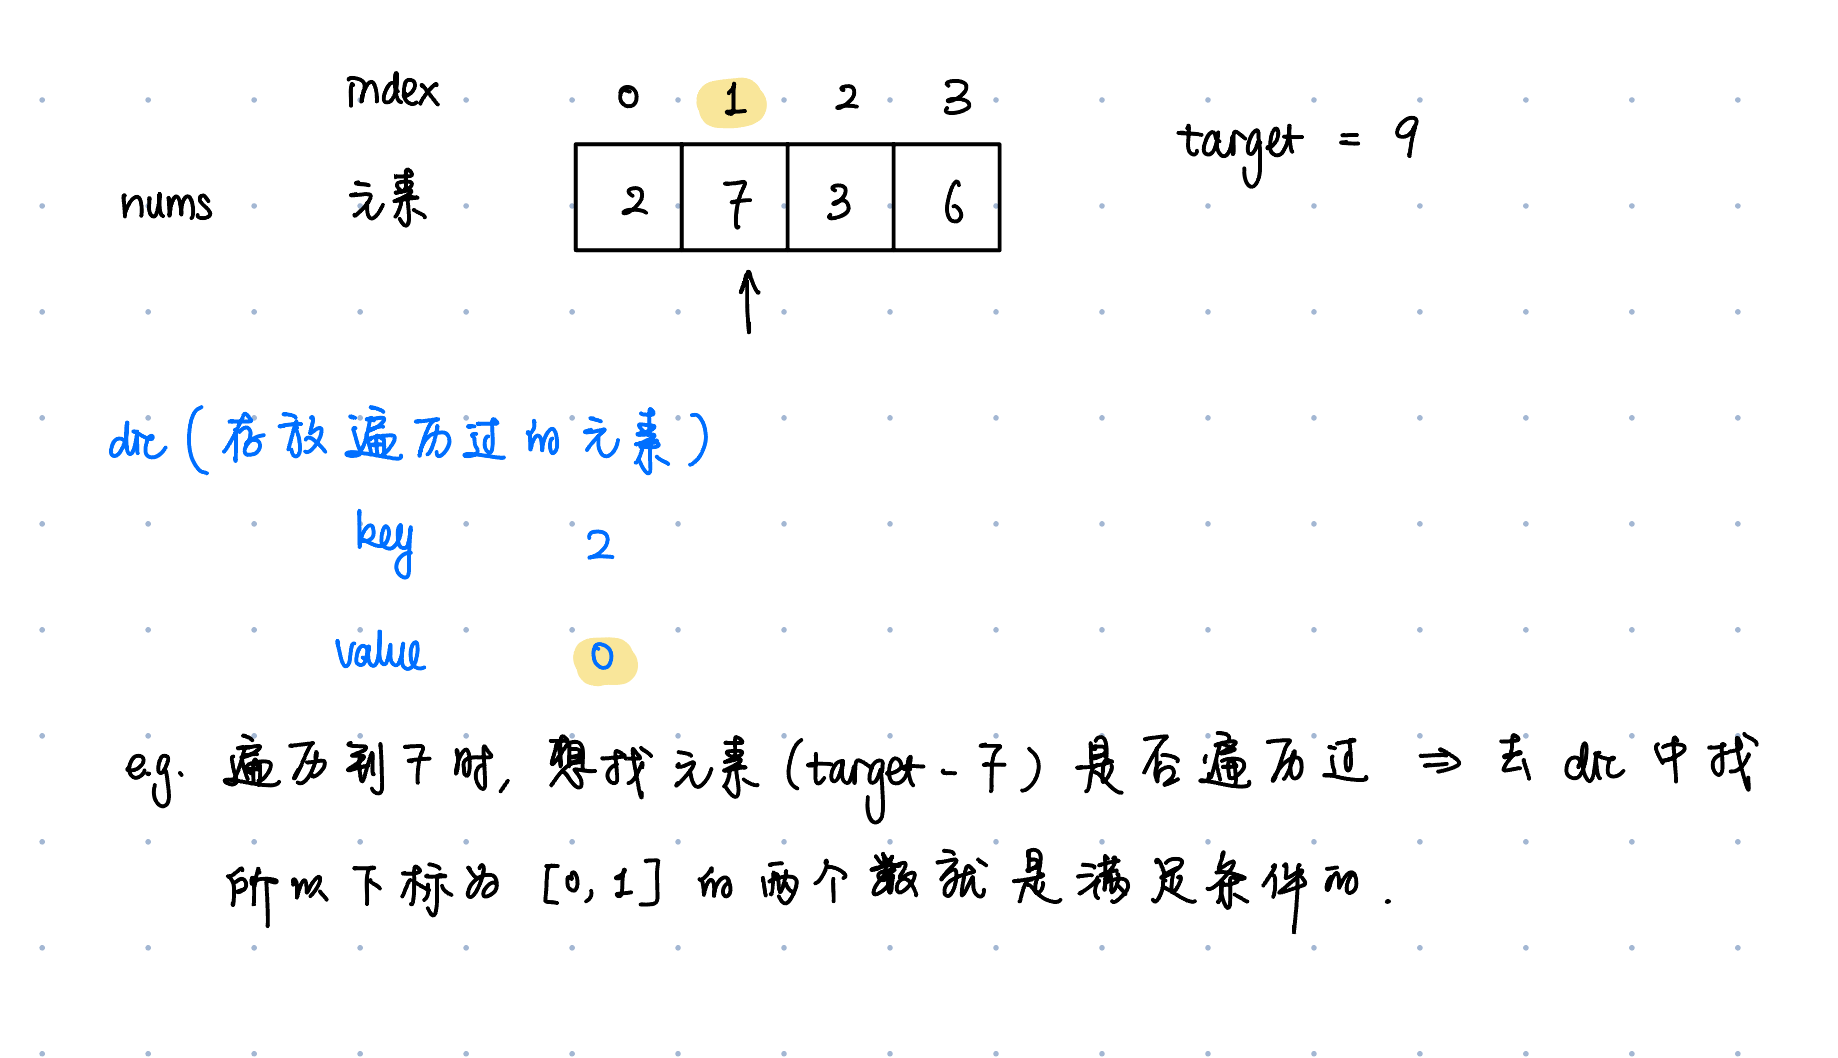

In [21]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        # method1: dict as hashtable
        # seen记录已经遍历过的元素及其位置
        seen = dict()

        for index, number in enumerate(nums):
            s = target - number
            # 我们要查找s是否在seen中出现过
            if s in seen.keys():
                return [seen[s], index]
            else:
                # 如果没有找到匹配对，那么就把访问过的元素和下标都加入到seen中
                seen[number] = index

In [18]:
# remark: enumerate 用法
nums = [2,7,11,15]
for index, value in enumerate(nums):
    print(index, value)

0 2
1 7
2 11
3 15


### method2: set as hashtable
思路跟dict一模一样，就是用了`nums.index(s)`来找某个数`s`对应的下标，相当于讨巧了，所以省略了把原数组下标作为dictionary的value存放的步骤。

In [ ]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        # method2: set as hashtable
        # seen记录已经遍历过的元素
        seen = set()

        for index, number in enumerate(nums):
            s = target - number
            # 我们要查找s是否在seen中出现过
            if s in seen:
                # s 在nums中的position怎么找？因为现在没有dictionary来存放value了
                # nums.index(s)
                return [nums.index(s), index] 
            else:
                # 如果没有找到匹配对，那么就把访问过的元素都加入到seen中
                seen.add(number)

In [23]:
# remark
nums = [2,7,11,LC1LCLCLCLCLC15]
nums.index(11)

2

时间复杂度：$O(N)$
(查找元素是否在dict/set中都是$O(1)$)

空间复杂度：$O(N)$


## LC454. 4 Sum II (Medium)

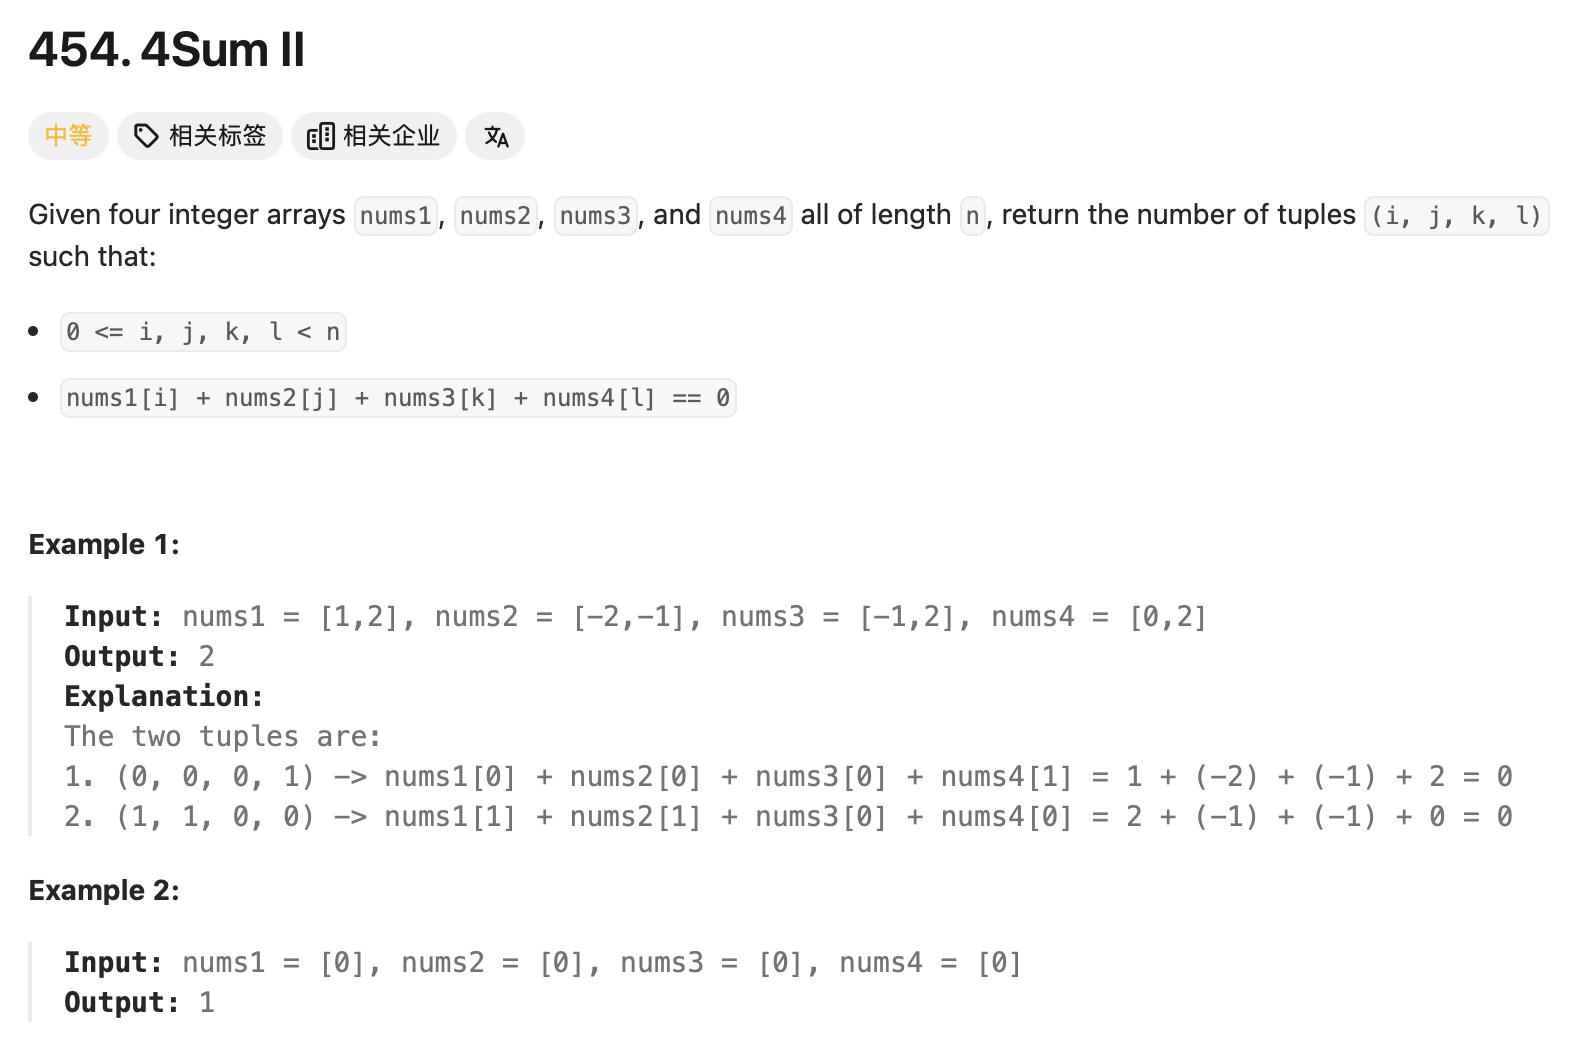

**思路**

本题乍眼一看好像和 LC15.三数之和，LC18.四数之和 差不多，其实差很多。

本题是使用哈希法的经典题目，而LC15.三数之和，LC18.四数之和 并不合适使用哈希法，因为三数之和和四数之和这两道题目使用哈希法在不超时的情况下做到对结果去重是很困难的，很有多细节需要处理。

而这道题目是四个独立的数组，只要找到A[i] + B[j] + C[k] + D[l] = 0就可以，不用考虑有重复的四个元素相加等于0的情况，所以相对于题目18. 四数之和，题目15.三数之和，还是简单了不少！

如果本题想难度升级：就是给出一个数组（而不是四个数组），在这里找出四个元素相加等于0，答案中不可以包含重复的四元组，大家可以思考一下，后续的文章我也会讲到的。

**解题步骤：**

1. 首先定义一个 `hashmap`，`key` 放 A 和 B 两数之和，`value` 放 A 和 B 两数之和出现的次数。
2. 遍历数组 A 和 B，统计两个数组元素之和及其出现的次数，放到 `hashmap` 中。
3. 定义一个 `int` 变量 `count`，用于统计 `a + b + c + d = 0` 出现的次数。
4. 再遍历数组 C 和 D，检查 `0 - (c + d)` 是否存在于 `hashmap` 中，如果存在，将其对应的出现次数累加到 `count` 中。
5. 最后返回统计值 `count`。


In [4]:
class Solution:
    def fourSumCount(self, nums1: List[int], nums2: List[int], nums3: List[int], nums4: List[int]) -> int:
        # Method1: Dict as hashmap
        hashmap = dict()

        # hashmap的key是nums1，nums2中的元素之和，value是出现的次数
        for n1 in nums1:
            for n2 in nums2:
                if n1 + n2 in hashmap.keys():
                    hashmap[n1+n2] += 1
                else:
                    hashmap[n1+n2] = 1

        count = 0

        # Iterate over nums3 & nums4, 如果 0-(n3+n4) 在map中出现过的话，
        # 就用count把map中key对应的value也就是出现次数统计出来。
        for n3 in nums3:
            for n4 in nums4:
                if 0 - (n3 + n4) in hashmap.keys():
                    # 出现的次数
                    count += hashmap.get(-(n3 + n4), 0) # 如果没有找到key，返回0

        return count
    
# test
letter_count = Solution()
letter_count.fourSumCount([1,2], [-2,-1], [-1,2], [0,2])

2

- `hashmap.get(x, 0)` tries to retrieve the value associated with the key `x` in the dictionary rec.
    If the key `x` exists in the dictionary, it returns the associated value.
    If the key does not exist, it returns 0 (the second argument to the get method).
- 普通 dictionary 在调用key的时候都需要考虑key是否存在的情况！


或使用defaultdict

In [10]:
class Solution:
    def fourSumCount(self, nums1: List[int], nums2: List[int], nums3: List[int], nums4: List[int]) -> int:
        # Method1: Dict as hashmap
        from collections import defaultdict

        record, count = defaultdict(int), 0 
        for n1 in nums1:
            for n2 in nums2:
                record[n1+n2] += 1
        
        for n3 in nums3:
            for n4 in nums4:
                count += record[-(n3+n4)] # 0 if the key is not found

        return count
    
# test
letter_count = Solution()
letter_count.fourSumCount([1,2], [-2,-1], [-1,2], [0,2])

2

This creates a `defaultdict` (from Python's collections module), which is a special type of dictionary that provides a default value for missing keys.

The argument `lambda: 0` means that if a key is accessed in record that does not exist, it will automatically be added to the dictionary with a value of 0 (the result of lambda: 0).

In [7]:
from collections import defaultdict

# Creating a defaultdict without specifying a default value
record = defaultdict()

# Accessing a key that doesn't exist will raise an error
print(record['missing_key'])


KeyError: 'missing_key'

If you want to specify a default value of 0 for missing keys in a defaultdict, you can do so by passing a default factory function like `lambda: 0` (or `int`) when creating the defaultdict.

In [8]:
from collections import defaultdict

# If you want to specify a default value, then if the key is absent, its default value is 0
record = defaultdict(int) 
# or record = defaultdict(lambda: 0)

# Accessing a key that doesn't exist will raise an error
print(record['missing_key'])  

0


## LC15. 3Sum (Medium)

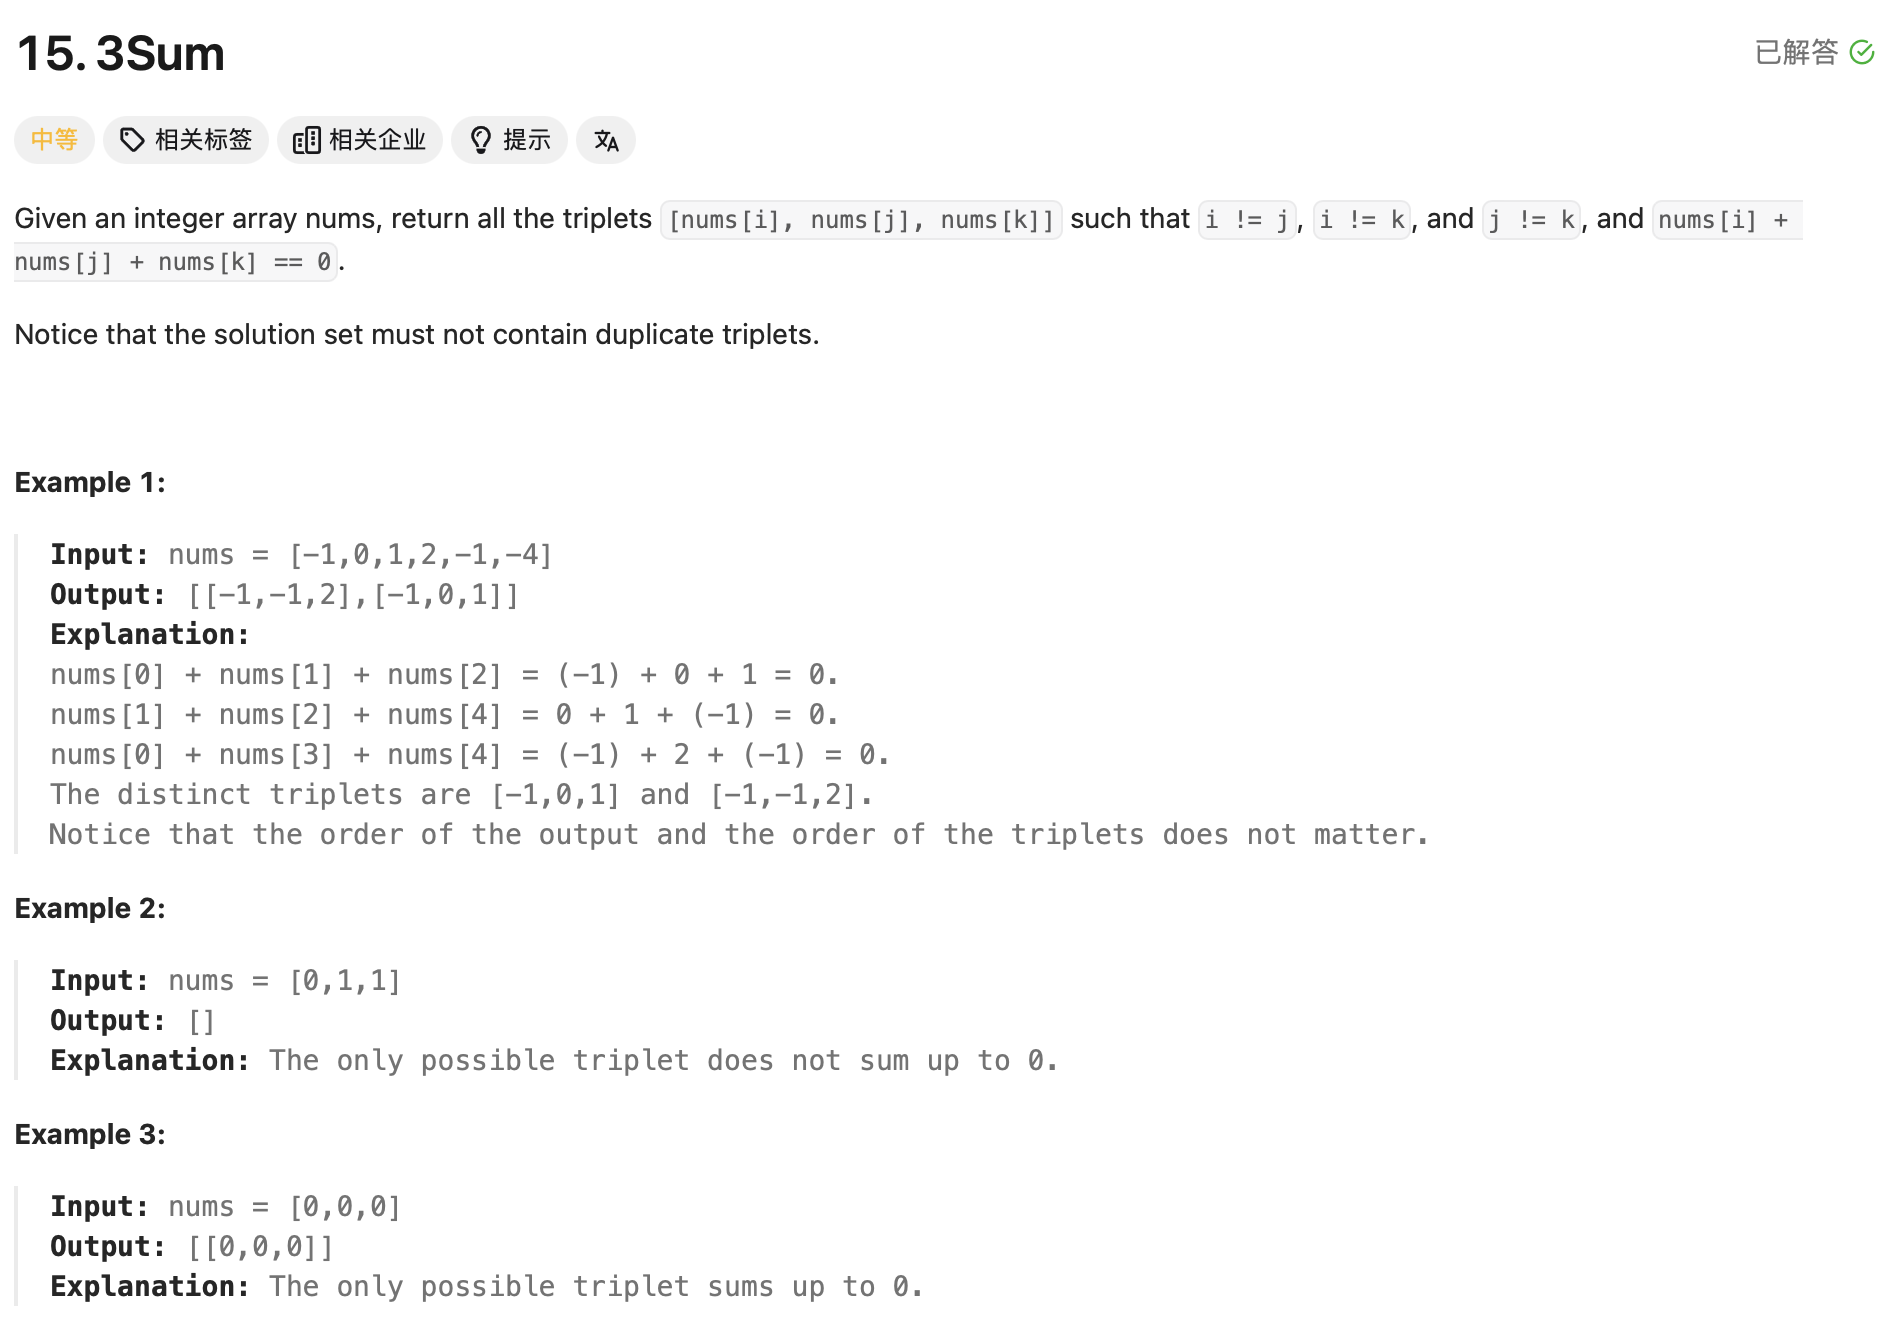

### **思路**

两层for循环就可以确定 a 和 b 的数值了，可以使用哈希法来确定 0-(a+b) 是否在数组里出现过，其实这个思路是正确的，但是我们有一个非常棘手的问题，就是题目中说的不可以包含重复的三元组。

把符合条件的三元组放进 vector 中，然后再去重，这样是非常费时的，很容易超时，也是这道题目通过率如此之低的根源所在。

去重的过程不好处理，有很多小细节，所以很难写出 bug-free 的东西。


### **双指针**

其实这道题目使用哈希法并不十分合适，因为在去重的操作中有很多细节需要注意，在面试中很难直接写出没有bug的代码。

而且使用哈希法在使用两层for循环的时候，能做的剪枝操作很有限，虽然时间复杂度是 $O(N^2)$，也是可以在leetcode上通过，但是程序的执行时间依然比较长。

接下来我来介绍另一种解法：**双指针法**，这道题目使用双指针法要比哈希法高效一些，具体实现的思路如下。

（1）首先将数组排序，然后第一个**指针i**，用一层for循环，从 0 的位置上开始，同时定一个**left指针**定义在 i+1 的位置上，定义**right指针**在数组结尾的位置上。

我想要在数组中找到abc使得 $a+b+c=0$，相当于 $a=nums[i]$， $b=nums[left]$， $c=nums[right]$。

（2）接下来如何移动left和right呢？

如果 $nums[i] + nums[left] + nums[right] > 0$ 就说明此时三数之和大了，因为数组是排好序了，所以right指针就应该向左移动，这样才能让三数之和小一些。

如果 $nums[i] + nums[left] + nums[right] < 0$ 说明 此时三数之和小了，left指针就向右移动，才能让三数之和大一些，直到left与right相遇为止。

**Remark**: 为了节省时间，从现在开始我的刷题笔记只写大方向，具体细节需要看解析or卡哥的视频讲解。


In [4]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        nums = sorted(nums) # O(NlogN)
        res = []

        # 逐个搜索，固定一个数i，剩下的问题就是two sum
        for i in range(len(nums)):
            ### 剪枝1：If the current number is greater than 0, 
            # then the sum of the three numbers must be greater than 0
            if nums[i] > 0:
                break # 直接停止搜索
            
            ### 去重1: 现在正在搜索的数跟前一个搜索过的数一样，那么跳过
            # 例如：[-3, -3, 0, 1, 2], suppose现在i指向第二个-3，那么[-3, 1, 2]已经被收集到结果集里面了
            if i > 0 and nums[i] == nums[i - 1]: 
                continue

            ### 剩下两个数：two sum, use pointers
            left, right = i + 1, len(nums) - 1
            target = 0 - nums[i]

            while left < right: # 指针终止条件
                # 先处理符合要求的
                if nums[left] + nums[right] == target:
                    res.append([nums[i], nums[left], nums[right]])

                    ###去重2: 处理left和right的重复
                    # 例如: [-1, -1, -1, 1, 1, 1] 我们已经收集了最左边和最右边的[-1, 1]，剩下的都是重复的，不需要收集
                    # 所以left指针要持续向右边移动，直到看见不一样的left数值
                    while left < right and nums[left] == nums[left + 1]:
                        left += 1
                    while left < right and nums[right] == nums[right - 1]:
                        right -= 1
                    
                    # 指针移动条件
                    left += 1
                    right -= 1
                
                # 不符合要求的
                elif nums[left] + nums[right] < target:
                    left += 1
                else:
                    right -= 1
        return res



# test
letter_count = Solution()
letter_count.threeSum([-1,0,1,2,-1,-4])

[[-1, -1, 2], [-1, 0, 1]]

时间复杂度：$O(N^2)$

**Comments**:

既然三数之和可以使用双指针法，我们之前讲过的 LC1.两数之和，可不可以使用双指针法呢？

如果不能，题意如何更改就可以使用双指针法呢？大家留言说出自己的想法吧！

两数之和不能直接使用双指针法，因为 LC1.两数之和要求返回的是索引下标，而双指针法通常需要对数组排序，排序后原数组的索引会被改变。

如果 LC1 两数之和要求返回的是数值而不是下标，就可以使用双指针法来解决了。

（当然，也有一种方法是建立一个包含original index的tuple，然后在排序时带上这个index。这样可以在排序后的双指针法中找到符合条件的数对，并同时保留原始的index。）

## LC18. 4Sum (Medium)

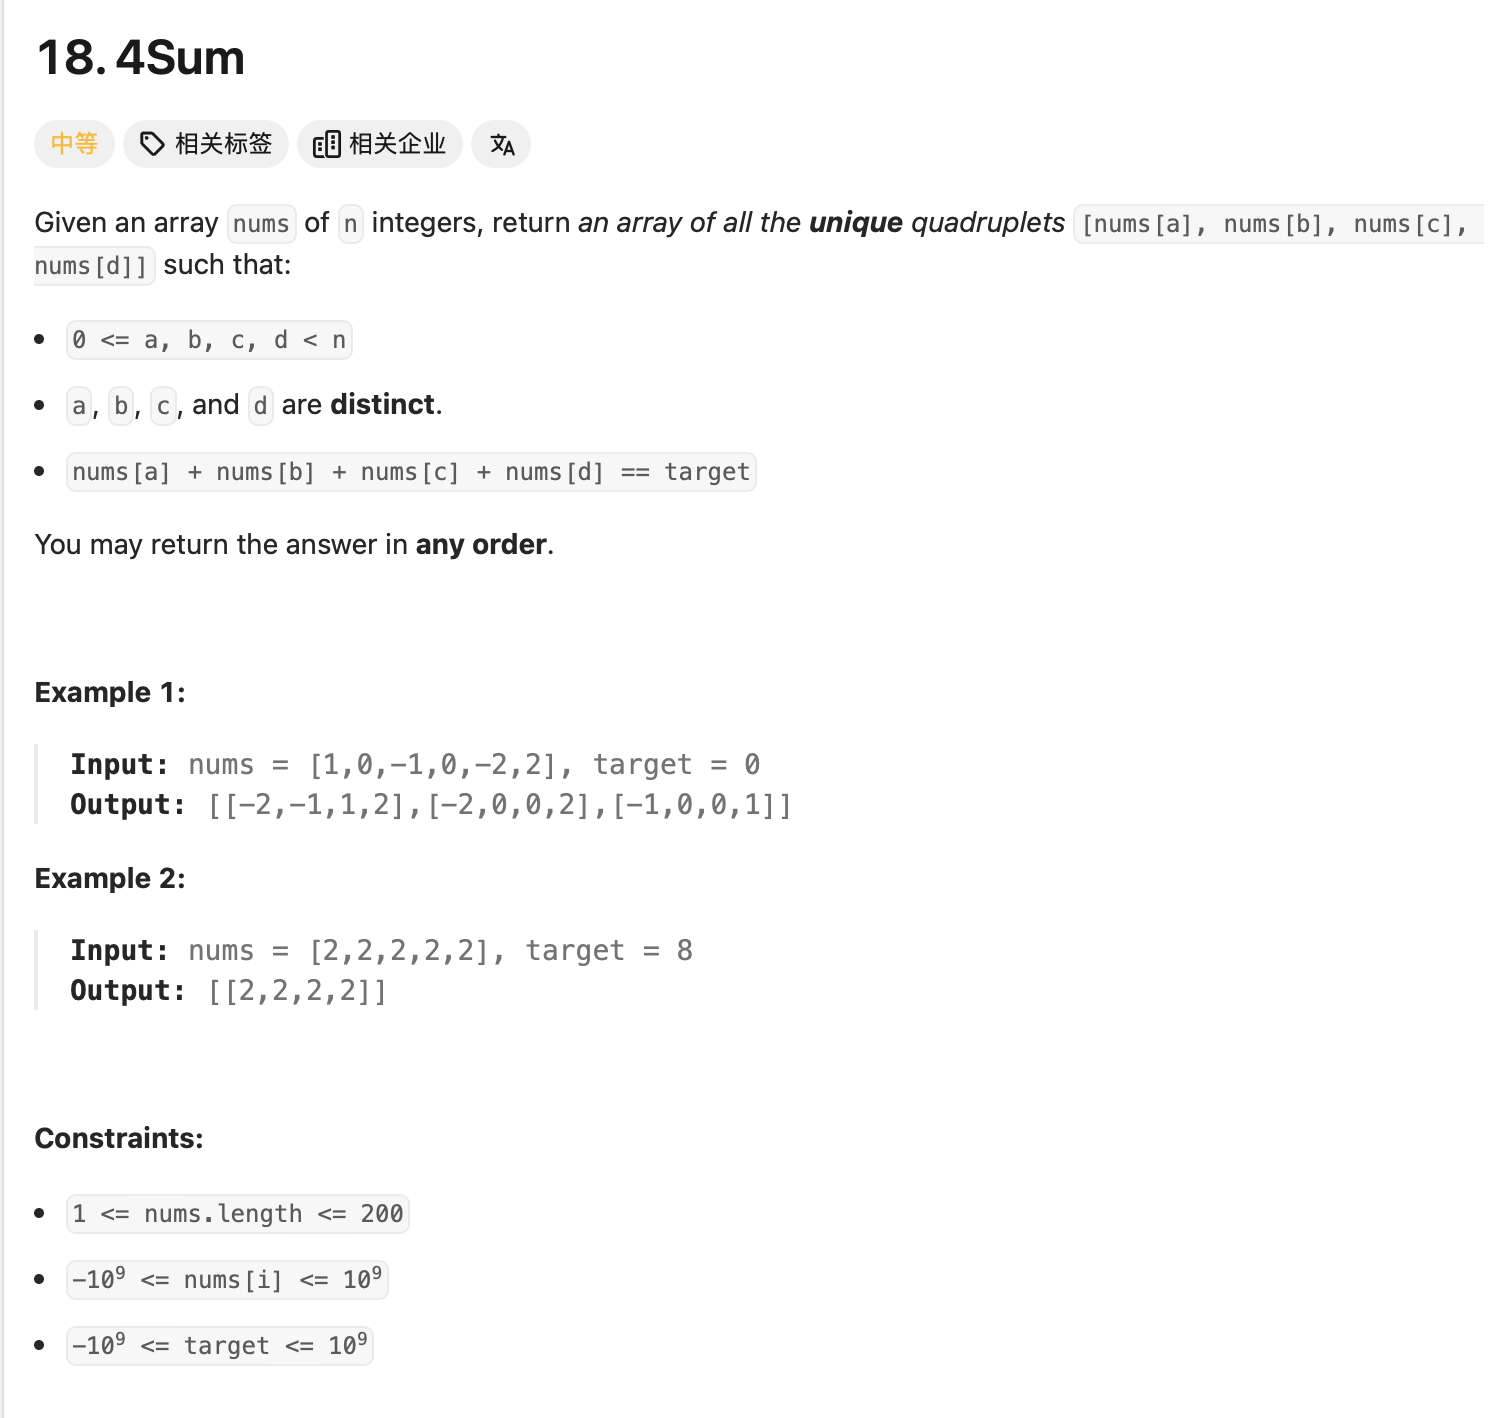

### **思路**

- 难点在于**剪枝** 和 **去重**！

- 四数之和，和 LC15. 三数之和 是一个思路，都是使用双指针法，基本解法就是在 LC15. 三数之和 的基础上再套一层for循环。 LC15. 三数之和 的双指针解法是一层for循环 `num[i]` 为确定值，然后循环内有left和right下标作为双指针，找到 `nums[i] + nums[left] + nums[right] == 0`。

- 四数之和的双指针解法是两层for循环 `nums[k] + nums[i]` 为确定值，依然是循环内有left和right下标作为双指针，找出 `nums[k] + nums[i] + nums[left] + nums[right] == target` 的情况，三数之和的时间复杂度是 `O(N^2)`，四数之和的时间复杂度是 `O(N^3)`。

- 但是有一些细节需要注意，例如：不要判断 `nums[k] > target` 就返回了，三数之和 可以通过 `nums[i] > 0` 就返回了，因为 0 已经是确定的数了，四数之和这道题目 target 是任意值。例如：数组是 `[-4, -3, -2, -1]`，target 是 `-10`，不能因为 `-4 > -10` 而跳过。但是我们依旧可以去做剪枝，逻辑变成 `nums[i] > target > 0` 就可以了。那么一样的道理，五数之和、六数之和等都采用这种解法。


In [5]:
class Solution:
    def fourSum(self, nums: List[int], target: int) -> List[List[int]]:

        nums.sort()
        res = []

        # 固定一个数i
        for i in range(len(nums)):
            if nums[i] > target and target > 0: # 剪枝 (可省略)
                break
            if i > 0 and nums[i] == nums[i - 1]:  # 去重
                continue

            # 固定第二个数j
            for j in range(i+1, len(nums)):
                if nums[i] + nums[j] > target and target > 0:  # 剪枝 (可省略)
                    break
                if j > i + 1 and nums[j] == nums[j - 1]:  # 去重
                    continue

                ### 剩下两个数：two sum, 用 pointers
                left, right = j+1, len(nums)-1
                while left < right: # 指针终止条件
                    # 先收集符合要求的
                    if nums[i] + nums[j] + nums[left] + nums[right] == target:
                        res.append([nums[i], nums[j], nums[left], nums[right]])

                        # 双指针里的去重, 想例子[-1, -1, -1, 1, 1, 1]
                        # 移动left & right指针，直到遇到不一样的数为止，我们再考虑要不要收集
                        while left < right and nums[left] == nums[left + 1]:
                            left += 1 
                        while left < right and nums[right] == nums[right - 1]:
                            right -= 1
                    
                        # 指针移动条件
                        left += 1
                        right -= 1
                    
                    # 不符合要求的
                    elif nums[i] + nums[j] + nums[left] + nums[right] < target:
                        left += 1
                    else:
                        right -= 1
        
        return res


# test
letter_count = Solution()
letter_count.fourSum([1,0,-1,0,-2,2], 0)


[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]

时间复杂度：$O(N^3)$

**对比LC454. 4 Sum II**

之前我们讲过哈希表的经典题目：454. 四数相加 II，相对于本题简单很多，因为本题是要求在一个集合中找出四个数相加等于 target，同时四元组不能重复。

而 454. 四数相加 II 是四个独立的数组，只要找到 A[i] + B[j] + C[k] + D[l] = 0 就可以，不用考虑有重复的四个元素相加等于 0 的情况，所以相对于本题还是简单了不少！

### 双指针应用总结

Recall: LC15.三数之和，LC18.四数之和 并不合适使用哈希法，因为三数之和和四数之和这两道题目使用哈希法在不超时的情况下做到对结果去重是很困难的，很有多细节需要处理。

对于 LC15. 三数之和，双指针法就是将原本暴力 $O(N^3)$ 的解法，降为 $O(N^2)$ 的解法，四数之和的双指针解法就是将原本暴力 $O(N^4)$ 的解法，降为 $O(N^3)$ 的解法。

我们来回顾一下，几道题目使用了双指针法。

**本质上：双指针法将时间复杂度 $O(N^2)$ 的解法优化为 $O(N)$ 的解法。** 也就是降一个数量级，题目如下：

- 27. 移除元素
- 15. 三数之和
- 18. 四数之和

双指针法在字符串题目中还有很多应用，后面还会介绍到。
